<a href="https://colab.research.google.com/github/shreyas-redij/DL/blob/master/inception_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding    

In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.datasets import cifar10

In [11]:
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [12]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 99, 99, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 99, 99, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 99, 99, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten(input_shape=(256,256,3)))
#model.add(layers.k())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, steps_per_epoch=100, epochs=20, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/20
100/100 [==============================] - 37s 370ms/step - loss: 0.3567 - acc: 0.1847 - val_loss: 0.2381 - val_acc: 0.5038
Epoch 2/20
100/100 [==============================] - 35s 353ms/step - loss: 0.2824 - acc: 0.3490 - val_loss: 0.1734 - val_acc: 0.6732
Epoch 3/20
100/100 [==============================] - 35s 353ms/step - loss: 0.2234 - acc: 0.5070 - val_loss: 0.1475 - val_acc: 0.7245
Epoch 4/20
100/100 [==============================] - 35s 353ms/step - loss: 0.1978 - acc: 0.5860 - val_loss: 0.1233 - val_acc: 0.7744
Epoch 5/20
100/100 [==============================] - 35s 353ms/step - loss: 0.1757 - acc: 0.6623 - val_loss: 0.1082 - val_acc: 0.8129
Epoch 6/20
100/100 [==============================] - 35s 353ms/step - loss: 0.1630 - acc: 0.6927 - val_loss: 0.0949 - val_acc: 0.8399
Epoch 7/20
100/100 [==============================] - 35s 353ms/step - loss: 0.1514 - acc: 0.7227 - val_loss: 0.0873 - val_acc: 0.8573
Epoch 8/20
100/100 [==============================] - 3

In [ ]:
#model = tf.keras.models.load_model('my_model.h5')
model.save("cifar_model.h5")

In [ ]:
model1 = tf.keras.models.load_model("cifar_model.h5")

In [ ]:
model1

Input Dimensions - Image :  (128, 128, 3)


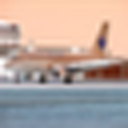

In [ ]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img= "http://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png"

input_img = io.imread(input_img)
input_img = cv2.resize(input_img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
cv2_imshow(input_img)

In [ ]:
import numpy as np
from keras.preprocessing import image
input_img = cv2.resize(input_img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(input_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model1.predict(x)
class_idx = np.argmax(preds[0])
preds[0],class_idx

(array([0.03652949, 0.05552444, 0.04844864, 0.19660503, 0.01910068,
        0.15215379, 0.02613155, 0.22327082, 0.03127896, 0.21095668],
       dtype=float32), 7)

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
for layer in conv_base.layers:
  layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
root_path='/content/drive/My Drive/iNeuron/pics'

In [ ]:
!unzip 'datasets_grey.zip'

unzip:  cannot find or open datasets_grey.zip, datasets_grey.zip.zip or datasets_grey.zip.ZIP.


In [ ]:
!ls

drive  gdrive  sample_data


In [ ]:
# useful for getting number of classes
from glob import glob
folders = glob('/content/drive/My Drive/iNeuron/pics/*')
print(len(folders))

0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory('12_superheros/CAX_Superhero_Train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 554 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/iNeuron/pics/test/',
                                            target_size = (75,75),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.k())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

model.fit_generator(x_train,y_train epochs=1, verbose=1,steps_per_epoch=5, validation_data=(x_train,y_test))

SyntaxError: ignored

In [ ]:
import PIL
PIL.__version__

'7.0.0'

In [ ]:
from keras.utils import plot_model
# plot model architecture
plot_model(conv_base, show_shapes=True, to_file='multiple_vgg_blocks.png')

In [ ]:
from keras.utils import plot_model
# plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')

# New Section